(module3-packages1/03-6-seaborn)=
# 6. Seaborn Part 2

## 3.3 Categorical Plots
| Plot Type     | Function         | Shows              | Best For (Chemistry) Examples                                          | Shows Individual Points? |
|---------------|------------------|--------------------|------------------------------------------------------------------------|---------------------------|
| Box Plot      | `sns.boxplot`    | Median, IQR, outliers | Comparing distributions of pH, melting points across groups             | No                        |
| Violin Plot   | `sns.violinplot` | Distribution + KDE  | Understanding shape of data like absorbance under conditions            | No                        |
| Strip Plot    | `sns.stripplot`  | Raw data points     | Showing individual measurements of reaction yield                       | Yes (may overlap)         |
| Swarm Plot    | `sns.swarmplot`  | Adjusted data points | Detailed look at replicates like synthesis output                       | Yes (non-overlapping)     |
| Bar Plot      | `sns.barplot`    | Mean + CI           | Summarizing average reaction times or concentrations                    | No                        |
| Count Plot    | `sns.countplot`  | Frequencies         | Counting how many times each ion type appears in a compound class       | No                        |

### Box Plot (sns.boxplot())
- Shows the distribution of data based on quartiles.
- Displays the median, interquartile range (IQR), and outliers.
- Great for comparing distributions between chemical groups or experimental conditions

A box plot (also called a box-and-whisker plot) summarizes a dataset using **five-number summary statistics**:

1. Minimum (excluding outliers)
2. First Quartile (Q1) — 25th percentile
3. Median (Q2) — 50th percentile
4. Third Quartile (Q3) — 75th percentile
5. Maximum (excluding outliers)

It also flags outliers as dots outside the whiskers.

####  Key Concepts

| Term             | What It Means                                                                 |
|------------------|--------------------------------------------------------------------------------|
| Quartile     | Values that divide your dataset into quarters.                                 |
| IQR (Interquartile Range) | Q3 − Q1, the range of the **middle 50%** of the data.                   |
| Whiskers     | Typically extend to the last data point **within 1.5 × IQR** from Q1/Q3.       |
| Outliers     | Points beyond the whiskers (outside 1.5 × IQR).                                |

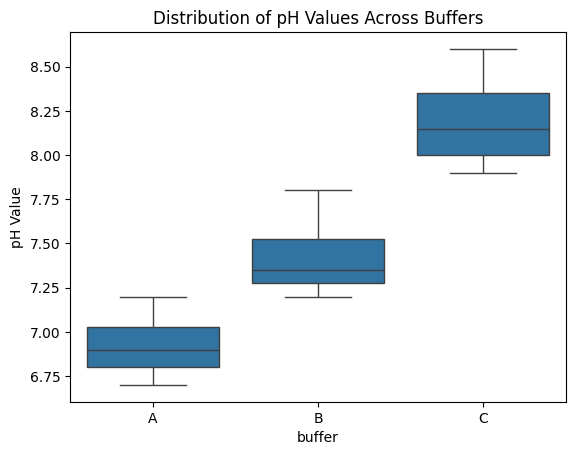

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = pd.DataFrame({
    "buffer": ["A"] * 8 + ["B"] * 8 + ["C"] * 8,
    "pH": [6.8, 7.0, 6.9, 7.2, 6.8, 7.1, 6.7, 6.9,
           7.4, 7.3, 7.6, 7.2, 7.5, 7.3, 7.8, 7.2,
           8.1, 8.0, 7.9, 8.2, 8.0, 8.3, 8.5, 8.6]
})

# Make a box plot
sns.boxplot(x="buffer", y="pH", data=data)
plt.ylabel("pH Value")
plt.title("Distribution of pH Values Across Buffers")
plt.show()


#### Anatomy of a Box Plot
| Element             | Symbol / Abbreviation | Description                                                                 |
|---------------------|------------------------|-----------------------------------------------------------------------------|
| Minimum             | —                      | Smallest value within 1.5×IQR below Q1 (start of lower whisker)            |
| Lower Whisker       | —                      | Extends from Q1 to the smallest non-outlier value                          |
| First Quartile      | Q1                     | 25th percentile; lower edge of the box                                     |
| Median              | Q2                     | 50th percentile; line inside the box                                       |
| Third Quartile      | Q3                     | 75th percentile; upper edge of the box                                     |
| Upper Whisker       | —                      | Extends from Q3 to the largest non-outlier value                           |
| Maximum             | —                      | Largest value within 1.5×IQR above Q3 (end of upper whisker)               |
| Interquartile Range | IQR                    | Q3 − Q1; range of the middle 50% of the data                               |
| Outliers            | —                      | Data points beyond 1.5×IQR from Q1 or Q3; plotted as individual dots       |

#### Interpreting Whisker Asymmetry

| Whisker Pattern            | Interpretation                                                            |
|----------------------------|-----------------------------------------------------------------------------|
| Long upper whisker     | Right-skewed distribution (positive skew) – long tail toward larger values |
| Long lower whisker     | Left-skewed distribution (negative skew) – long tail toward smaller values |
| Symmetrical whiskers   | Data is fairly symmetric around the median                                 |
Skewness describes asymmetry in the data. Box plots don't calculate skew, but long whiskers *often* hint at it.

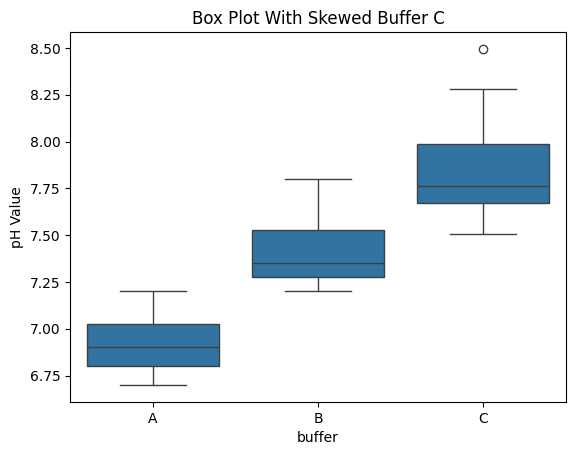

In [2]:
import numpy as np

# Create skewed data for Buffer C
np.random.seed(0)
buffer_c_skewed = np.random.exponential(scale=0.3, size=20) + 7.5  # Right-skewed

# Construct new DataFrame
data_skewed = pd.DataFrame({
    "buffer": ["A"] * 8 + ["B"] * 8 + ["C"] * 20,
    "pH": [6.8, 7.0, 6.9, 7.2, 6.8, 7.1, 6.7, 6.9,
           7.4, 7.3, 7.6, 7.2, 7.5, 7.3, 7.8, 7.2] + list(buffer_c_skewed)
})

sns.boxplot(x="buffer", y="pH", data=data_skewed)
plt.ylabel("pH Value")
plt.title("Box Plot With Skewed Buffer C")
plt.show()


### Violin Plot
- Combines a box plot with a kernel density estimate (KDE).
- Visualizes the distribution shape more clearly than a box plot alone.
- Useful for highlighting bimodal or skewed data in repeated measurements

#### Anatomy of a Violin Plot

| Feature              | Description |
|----------------------|-------------|
| Width of the “violin” | Represents the density of the data at that value (fatter = more data points there). |
| Center line       | The median (like in box plot). |
| Inner box / bars  | Can show quartiles (Q1, Q2, Q3) if enabled. |
| Tails             | Represent the range of the data, often matching the min/max or whiskers. |
| Symmetry          | Typically mirrored left and right, but can be customized (e.g., split violins). |

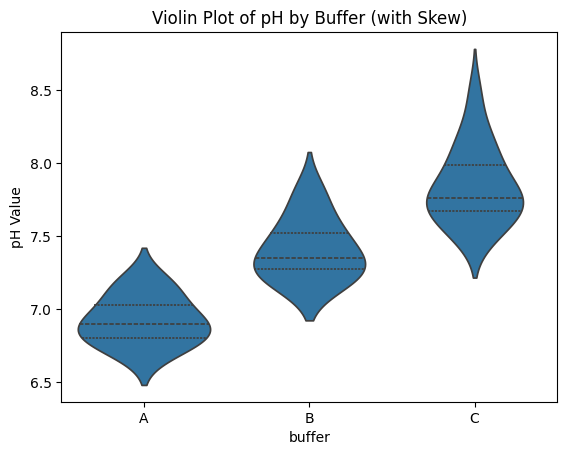

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Skewed buffer C for demonstration
np.random.seed(0)
buffer_c_skewed = np.random.exponential(scale=0.3, size=20) + 7.5

data_skewed = pd.DataFrame({
    "buffer": ["A"] * 8 + ["B"] * 8 + ["C"] * 20,
    "pH": [6.8, 7.0, 6.9, 7.2, 6.8, 7.1, 6.7, 6.9,
           7.4, 7.3, 7.6, 7.2, 7.5, 7.3, 7.8, 7.2] + list(buffer_c_skewed)
})

# Violin plot
sns.violinplot(x="buffer", y="pH", data=data_skewed, inner="quartile")  # inner="quartile" shows box stats
plt.title("Violin Plot of pH by Buffer (with Skew)")
plt.ylabel("pH Value")
plt.show()


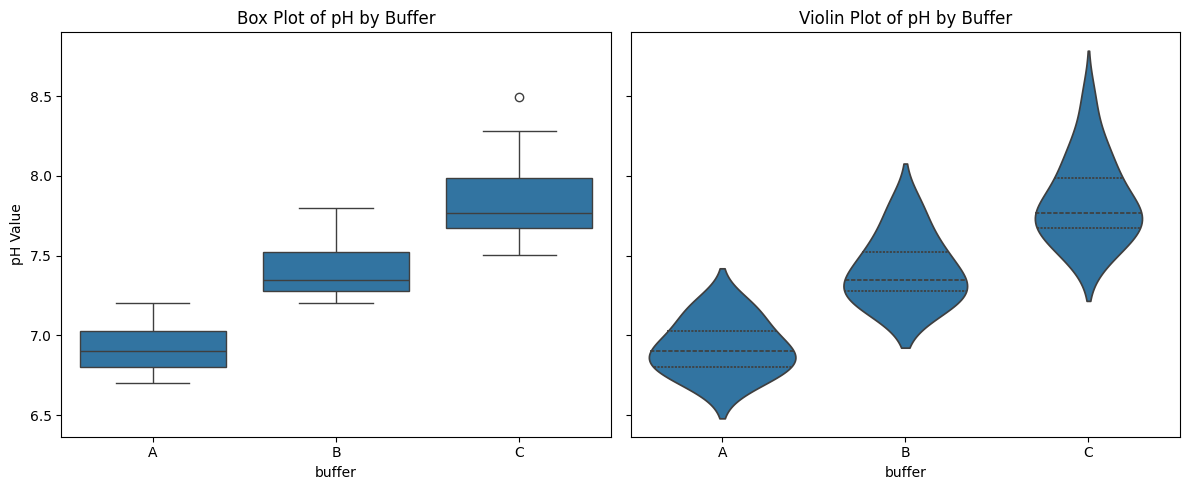

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate skewed Buffer C
np.random.seed(0)
buffer_c_skewed = np.random.exponential(scale=0.3, size=20) + 7.5

# Combine with normal data
data_skewed = pd.DataFrame({
    "buffer": ["A"] * 8 + ["B"] * 8 + ["C"] * 20,
    "pH": [6.8, 7.0, 6.9, 7.2, 6.8, 7.1, 6.7, 6.9,
           7.4, 7.3, 7.6, 7.2, 7.5, 7.3, 7.8, 7.2] + list(buffer_c_skewed)
})

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Box plot
sns.boxplot(x="buffer", y="pH", data=data_skewed, ax=axes[0])
axes[0].set_title("Box Plot of pH by Buffer")
axes[0].set_ylabel("pH Value")

# Violin plot
sns.violinplot(x="buffer", y="pH", data=data_skewed, inner="quartile", ax=axes[1])
axes[1].set_title("Violin Plot of pH by Buffer")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


####  Comparing Box to Violin Plots

| Feature            | Box Plot                                | Violin Plot                                 |
|--------------------|------------------------------------------|----------------------------------------------|
| Median             | Line in center of box                    | Same line, shown if `inner='quartile'`       |
| Quartiles          | Box edges                                | Shown inside if `inner='quartile'`           |
| Whiskers           | Lines to min/max within 1.5×IQR          | Not explicitly shown                         |
| Outliers           | Dots beyond whiskers                     | Not shown unless overlaid                    |
| Distribution Shape | Not shown                                | Clearly shown via width of violin            |
| Skewness           | Implied from whiskers/outliers           | Directly visible from asymmetric violin shape |

### Strip Plot
- Plots individual data points along a categorical axis.
- Can show raw data for transparency but may overlap.
- Often used in conjunction with box plots for validation.
**Jittering** means adding a small random displacement along the categorical axis (i.e., sideways) to prevent overlapping dots.

This is important because if multiple data points have the same or similar values, they would overlap on a strip plot. With jitter:
- You can see repeated values
- The plot becomes more readable

```python
sns.stripplot(x="buffer", y="pH", data=data_skewed, jitter=True)
```

You can control how much jitter with `jitter=0.1`, `0.2`, etc.

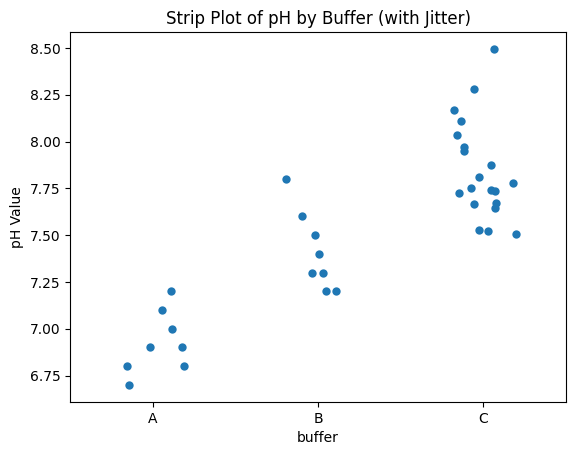

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip plot with jitter
sns.stripplot(x="buffer", y="pH", data=data_skewed, jitter=0.2, size=6)
plt.title("Strip Plot of pH by Buffer (with Jitter)")
plt.ylabel("pH Value")
plt.show()


### Swarm Plot
- Like a strip plot, but adjusts point positions to avoid overlaps.
- Useful for dense but non-overlapping point visualization.
- Perfect for small sample sizes, e.g., yields from multiple chemical syntheses.
- 
| Feature        | Strip Plot                             | Swarm Plot                                |
|----------------|---------------------------------------------|------------------------------------------------|
| Overlap        | Can have overlapping points                 | Avoids overlapping points                     |
| Readability    | Can become cluttered for dense data         | More readable when lots of points exist       |
| Display style  | Jittered vertically or horizontally         | Uses a special algorithm to arrange points    |
| Performance    | Faster with large datasets                  | Slower with large datasets                    |

        AtomicNumber       Name  AtomicMass CPKHexColor ElectronConfiguration  \
Symbol                                                                          
H                  1   Hydrogen    1.008000      FFFFFF                   1s1   
He                 2     Helium    4.002600      D9FFFF                   1s2   
Li                 3    Lithium    7.000000      CC80FF               [He]2s1   
Be                 4  Beryllium    9.012183      C2FF00               [He]2s2   
B                  5      Boron   10.810000      FFB5B5           [He]2s2 2p1   

        Electronegativity  AtomicRadius  IonizationEnergy  ElectronAffinity  \
Symbol                                                                        
H                    2.20         120.0            13.598             0.754   
He                    NaN         140.0            24.587               NaN   
Li                   0.98         182.0             5.392             0.618   
Be                   1.57         153

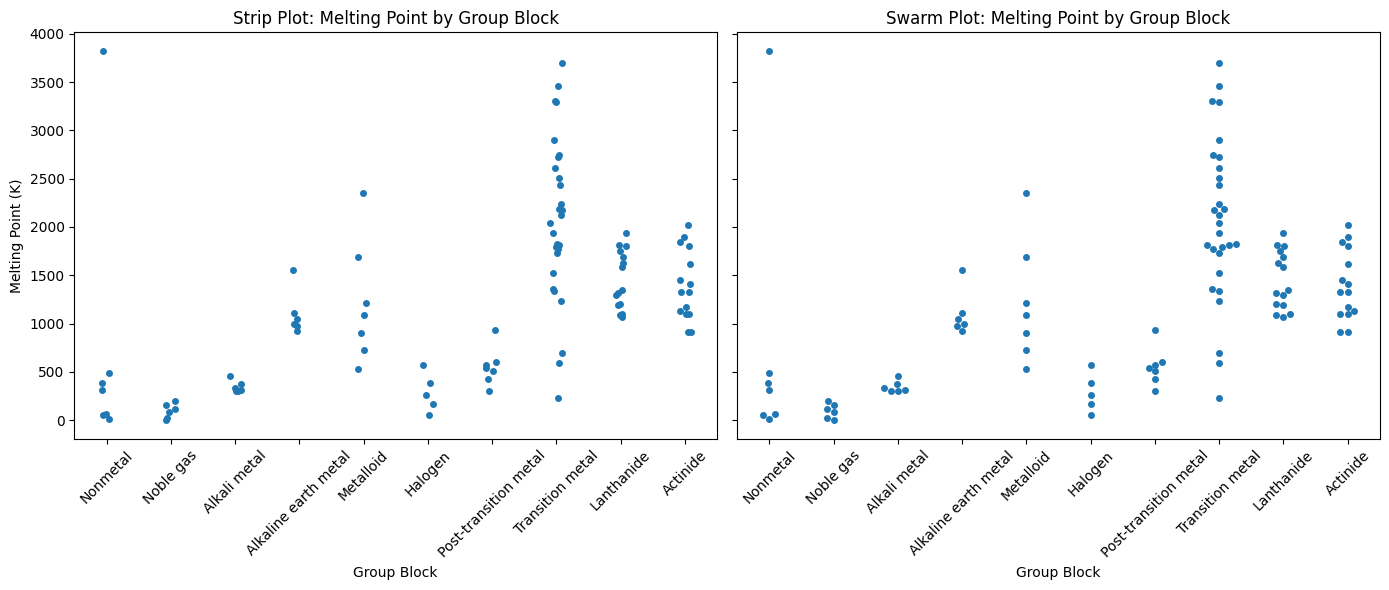

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load PubChem periodic table data
base_data_dir = os.path.expanduser("~/data")
pubchem_data_dir = os.path.join(base_data_dir, "pubchem_data")
periodictable_csv_datapath = os.path.join(pubchem_data_dir, "PubChemElements_all.csv")
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
print(df.head())
# Drop rows with missing MeltingPoint or GroupBlock
df = df.dropna(subset=["MeltingPoint", "GroupBlock"])

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Strip Plot
sns.stripplot(data=df, x="GroupBlock", y="MeltingPoint", jitter=True, ax=axes[0])
axes[0].set_title("Strip Plot: Melting Point by Group Block")
axes[0].set_xlabel("Group Block")
axes[0].set_ylabel("Melting Point (K)")

# Swarm Plot
sns.swarmplot(data=df, x="GroupBlock", y="MeltingPoint", ax=axes[1])
axes[1].set_title("Swarm Plot: Melting Point by Group Block")
axes[1].set_xlabel("Group Block")
axes[1].set_ylabel("")

# Rotate x-axis labels for both plots
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Bar Plot
- Plots means (or other summary statistics) with confidence intervals.
- Commonly used to summarize group averages (e.g., average reaction rate by catalyst)
#### Bar Plots vs. Histograms
- | Plot Type  | Good For...                          | Chemistry Example                          |
|------------|---------------------------------------|--------------------------------------------|
| Bar Plot   | Comparing values between categories   | Ionization energy by element or group      |
| Histogram  | Exploring data distribution/spread   | How melting points are distributed         |

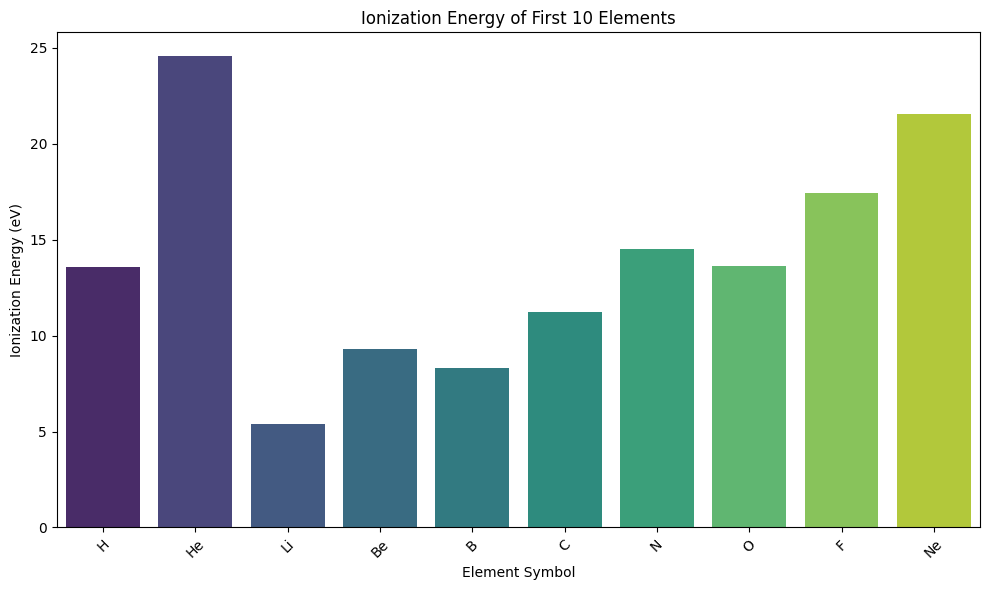

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data
base_data_dir = os.path.expanduser("~/data")
pubchem_data_dir = os.path.join(base_data_dir, "pubchem_data")
periodictable_csv_datapath = os.path.join(pubchem_data_dir, "PubChemElements_all.csv")
df = pd.read_csv(periodictable_csv_datapath, index_col=1)

# Drop missing values
df = df.dropna(subset=["IonizationEnergy"])

# Subset: first 10 elements
df_subset = df.head(10).copy()
df_subset["Symbol"] = df_subset.index  # Make symbol a column for hue

# Bar plot with palette + hue
plt.figure(figsize=(10, 6))
sns.barplot(data=df_subset, x="Symbol", y="IonizationEnergy", hue="Symbol", palette="viridis", legend=False)

plt.title("Ionization Energy of First 10 Elements")
plt.xlabel("Element Symbol")
plt.ylabel("Ionization Energy (eV)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


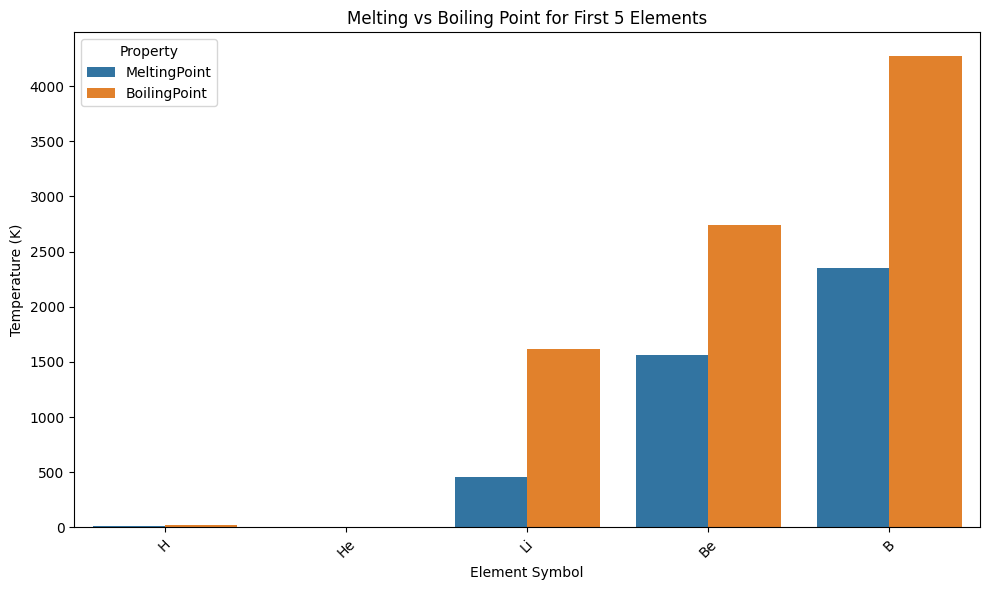

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
df = df.dropna(subset=["MeltingPoint", "BoilingPoint"])
df_subset = df.head(5).copy()
df_subset["Symbol"] = df_subset.index

# Reshape from wide to long format
df_melted = df_subset[["Symbol", "MeltingPoint", "BoilingPoint"]].melt(id_vars="Symbol",
                                var_name="Property", value_name="Temperature (K)")

# Grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Symbol", y="Temperature (K)", hue="Property")

plt.title("Melting vs Boiling Point for First 5 Elements")
plt.xlabel("Element Symbol")
plt.ylabel("Temperature (K)")
plt.xticks(rotation=45)
plt.legend(title="Property")

plt.tight_layout()
plt.show()


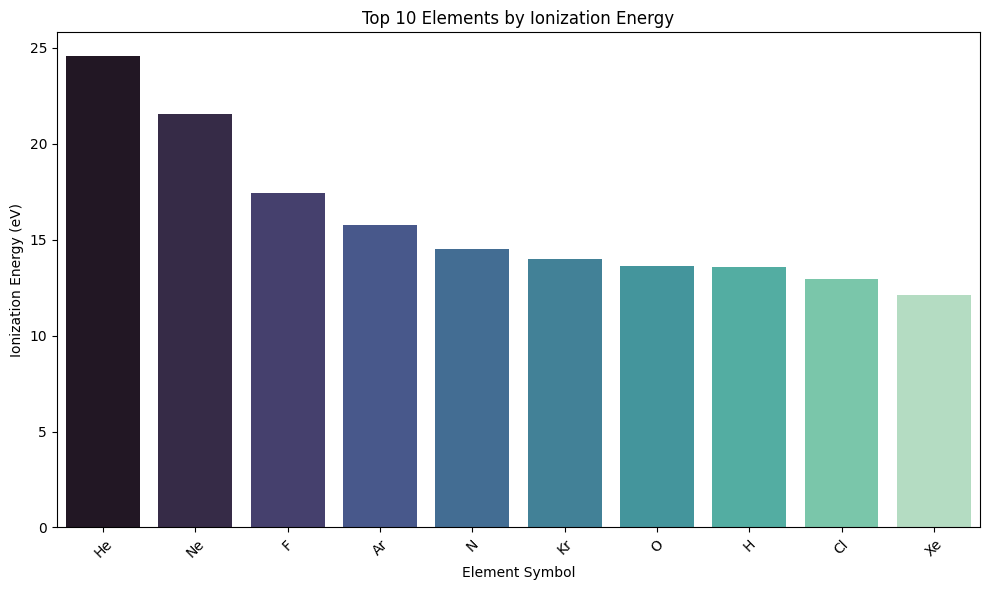

In [9]:
# Sorting the bars
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
df = df.dropna(subset=["IonizationEnergy"])
df_subset = df.copy()
df_subset["Symbol"] = df_subset.index

# Sort by IonizationEnergy
df_sorted = df_subset.sort_values("IonizationEnergy", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x="Symbol", y="IonizationEnergy", hue="Symbol", palette="mako")

plt.title("Top 10 Elements by Ionization Energy")
plt.xlabel("Element Symbol")
plt.ylabel("Ionization Energy (eV)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Count Plot
- Shows the frequency of observations in each category.
- Ideal for counting chemical types, classifications, or categorical labels.

A count plot is just a bar plot of value counts — it counts how many times each category appears in your data.

It’s like doing `df['GroupBlock'].value_counts()` and then turning that into a bar chart.

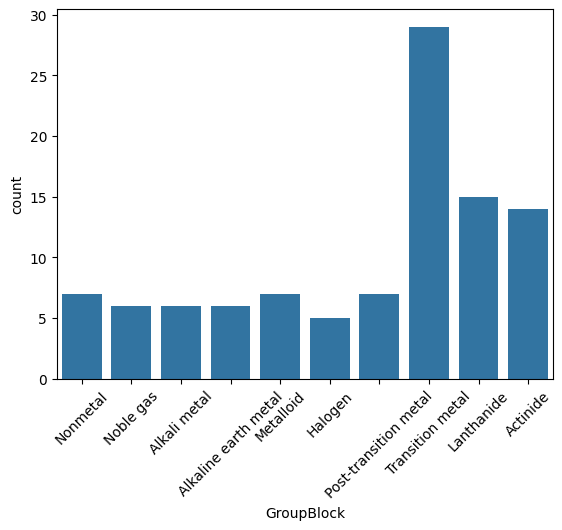

In [10]:
sns.countplot(data=df, x="GroupBlock")
plt.xticks(rotation=45);


### Categorical Multiplot (faceted)
A faceted categorical plot is a grid of subplots where each subplot shows a slice of the data based on a categorical variable (e.g., phase of matter, group block, decade discovered, etc.).

#### Overview of Faceted Plots


| Function         | Best for...                          | Plot Types (via `kind`)                | Use Case Example                                        |
|------------------|---------------------------------------|----------------------------------------|----------------------------------------------------------|
| `sns.catplot()`  | Categorical data                 | `"strip"`, `"swarm"`, `"box"`, `"violin"`, `"bar"`, `"count"` | Compare melting points across phases by group block     |
| `sns.relplot()`  | Relational (numeric ↔ numeric)   | `"scatter"`, `"line"`                  | Plot atomic radius vs. ionization energy, faceted by state |
| `sns.displot()`  **Distributions                    | `"hist"`, `"kde"`, `"ecdf"`            | Show histogram of boiling points by phase                |

**Common to all three:**
- All use **`col=`** or **`row=`** to create facet grids.
- All create **Figure-level** plots (not axes-level), so they manage layout for you.


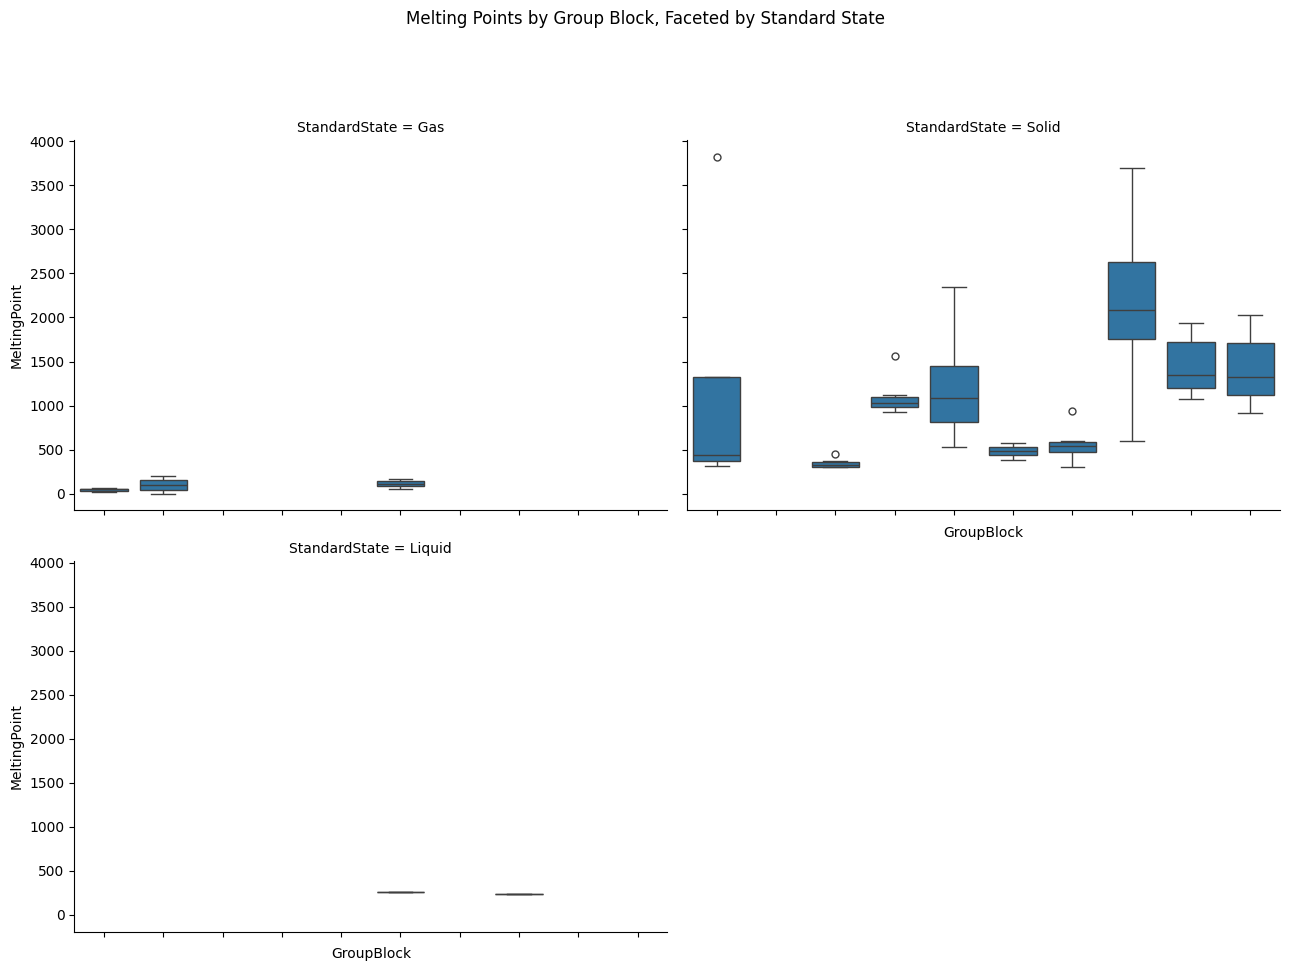

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)

# Clean data: drop missing values
df = df.dropna(subset=["MeltingPoint", "GroupBlock", "StandardState"])

# Plot: box plots of melting points by group, split by standard state
g = sns.catplot(
    data=df,
    x="GroupBlock", y="MeltingPoint",
    kind="box",
    col="StandardState",
    col_wrap=2,  # Wrap into 2 columns if more than 2 categories
    height=5,
    aspect=1.3
)

g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Melting Points by Group Block, Faceted by Standard State")
plt.show()


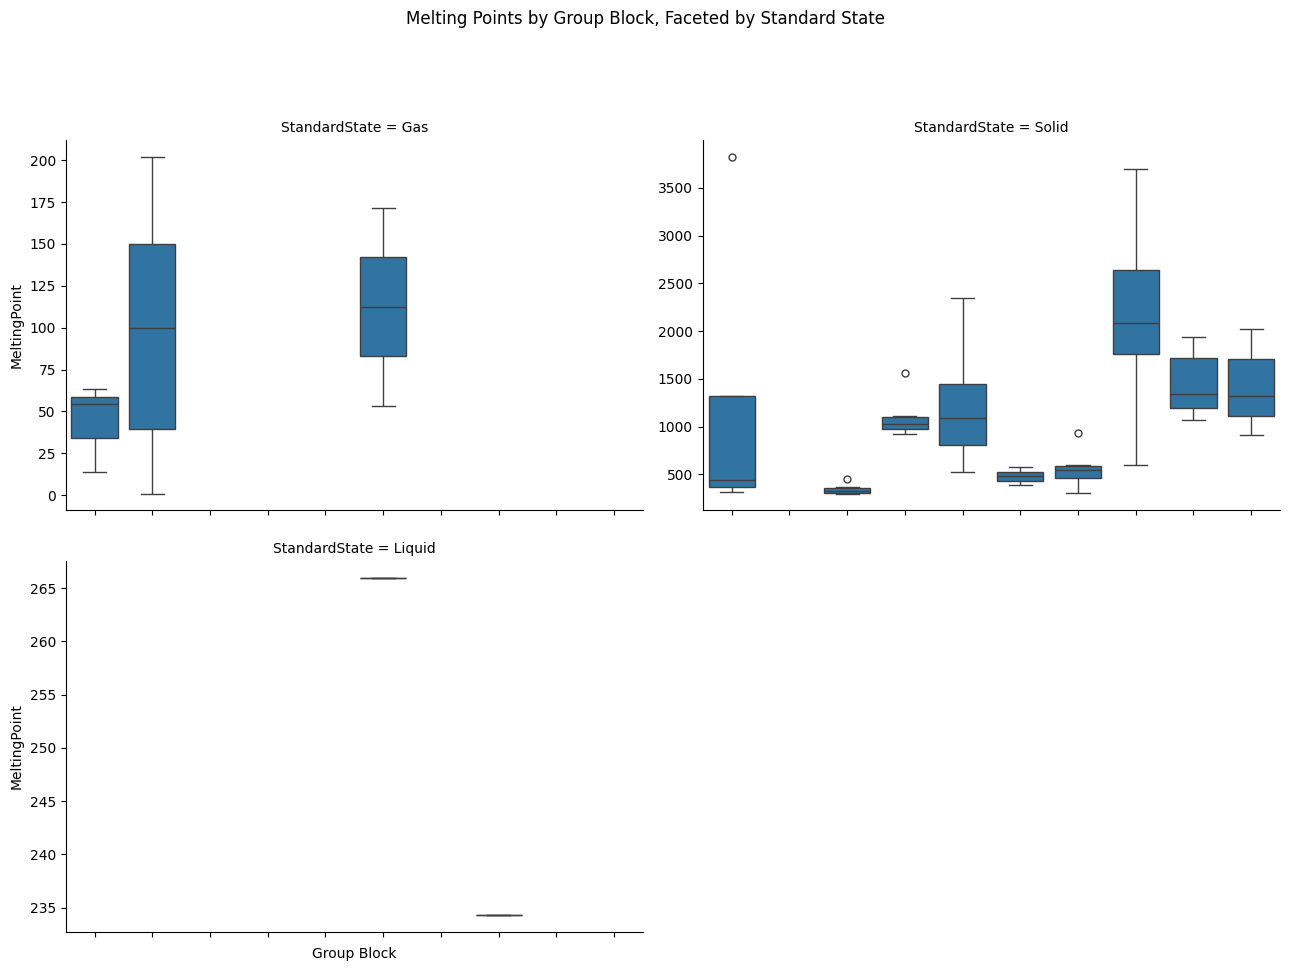

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
df = df.dropna(subset=["MeltingPoint", "GroupBlock", "StandardState"])

# Set consistent order for x categories
group_order = df["GroupBlock"].dropna().unique().tolist()

# Create the faceted box plot
g = sns.catplot(
    data=df,
    x="GroupBlock", y="MeltingPoint",
    kind="box",
    col="StandardState",
    col_wrap=2,
    height=5,
    aspect=1.3,
    sharey=False,
    order=group_order
)

# Draw the plot to populate tick labels
g.fig.canvas.draw()

# Get last axis (bottom-right plot) — only one we want to show labels
last_ax = g.axes.flat[-1]

# Rotate and align x-tick labels on bottom plot only
for label in last_ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

last_ax.set_xlabel("Group Block")

# Remove tick labels from all other axes
for ax in g.axes.flat[:-1]:
    ax.set_xticklabels([])
    ax.set_xlabel("")

# Add a main title
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Melting Points by Group Block, Faceted by Standard State")

plt.show()


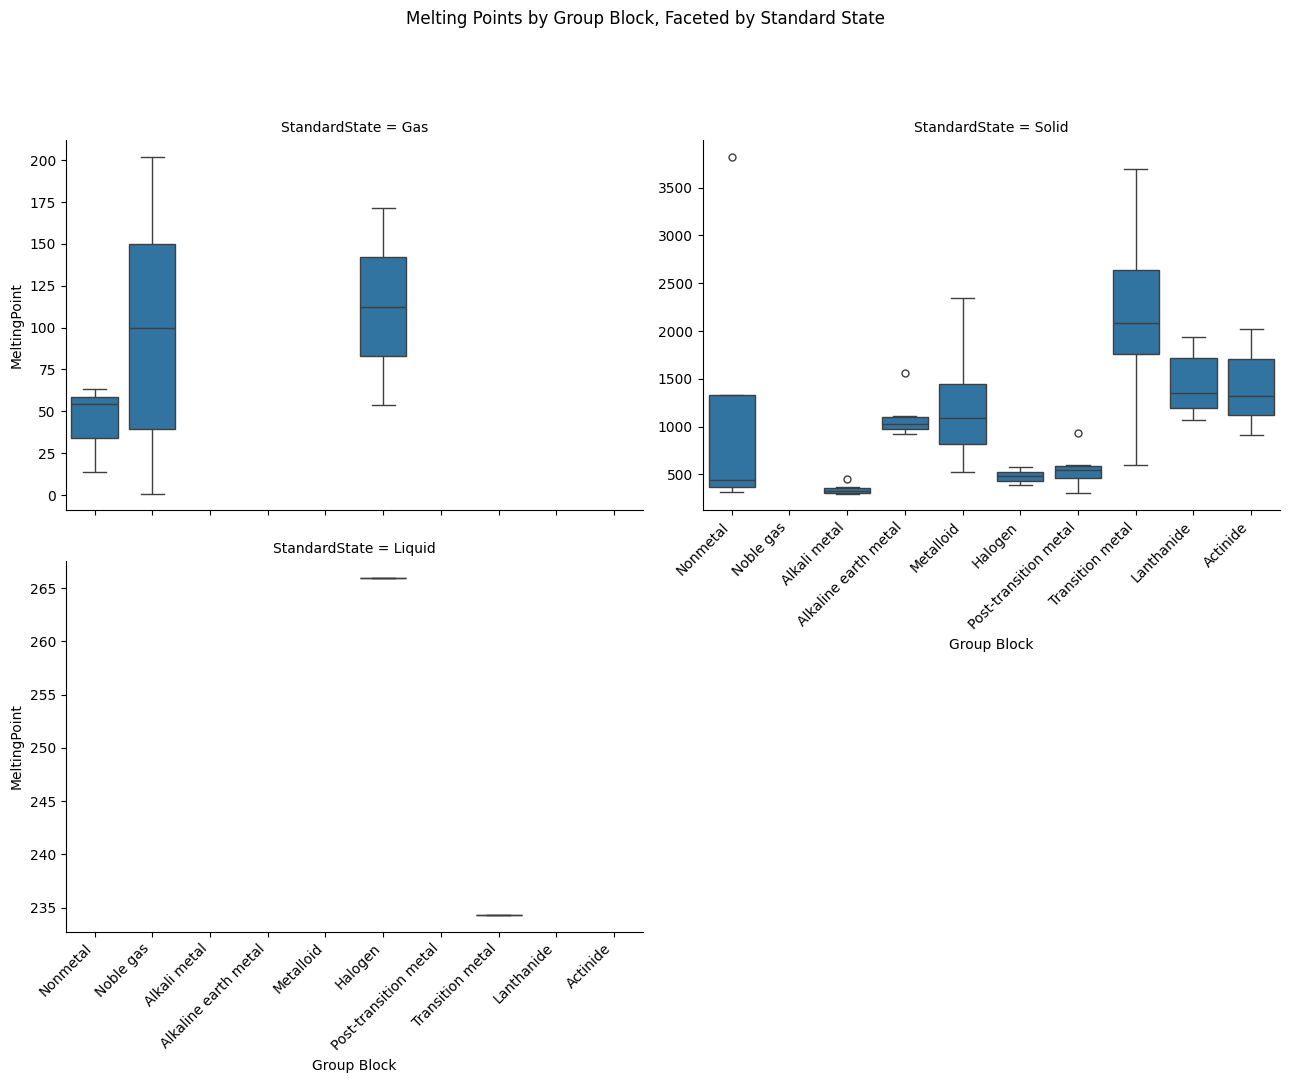

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
df = df.dropna(subset=["MeltingPoint", "GroupBlock", "StandardState"])

# Set consistent order of categories
group_order = df["GroupBlock"].dropna().unique().tolist()

# Create faceted box plots
g = sns.catplot(
    data=df,
    x="GroupBlock", y="MeltingPoint",
    kind="box",
    col="StandardState",
    col_wrap=2,
    height=5,
    aspect=1.3,
    sharey=False,
    order=group_order
)

# Rotate labels on all plots
g.fig.canvas.draw()  # Make sure tick labels exist
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
    ax.set_xlabel("Group Block")

# Title
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Melting Points by Group Block, Faceted by Standard State")

plt.show()


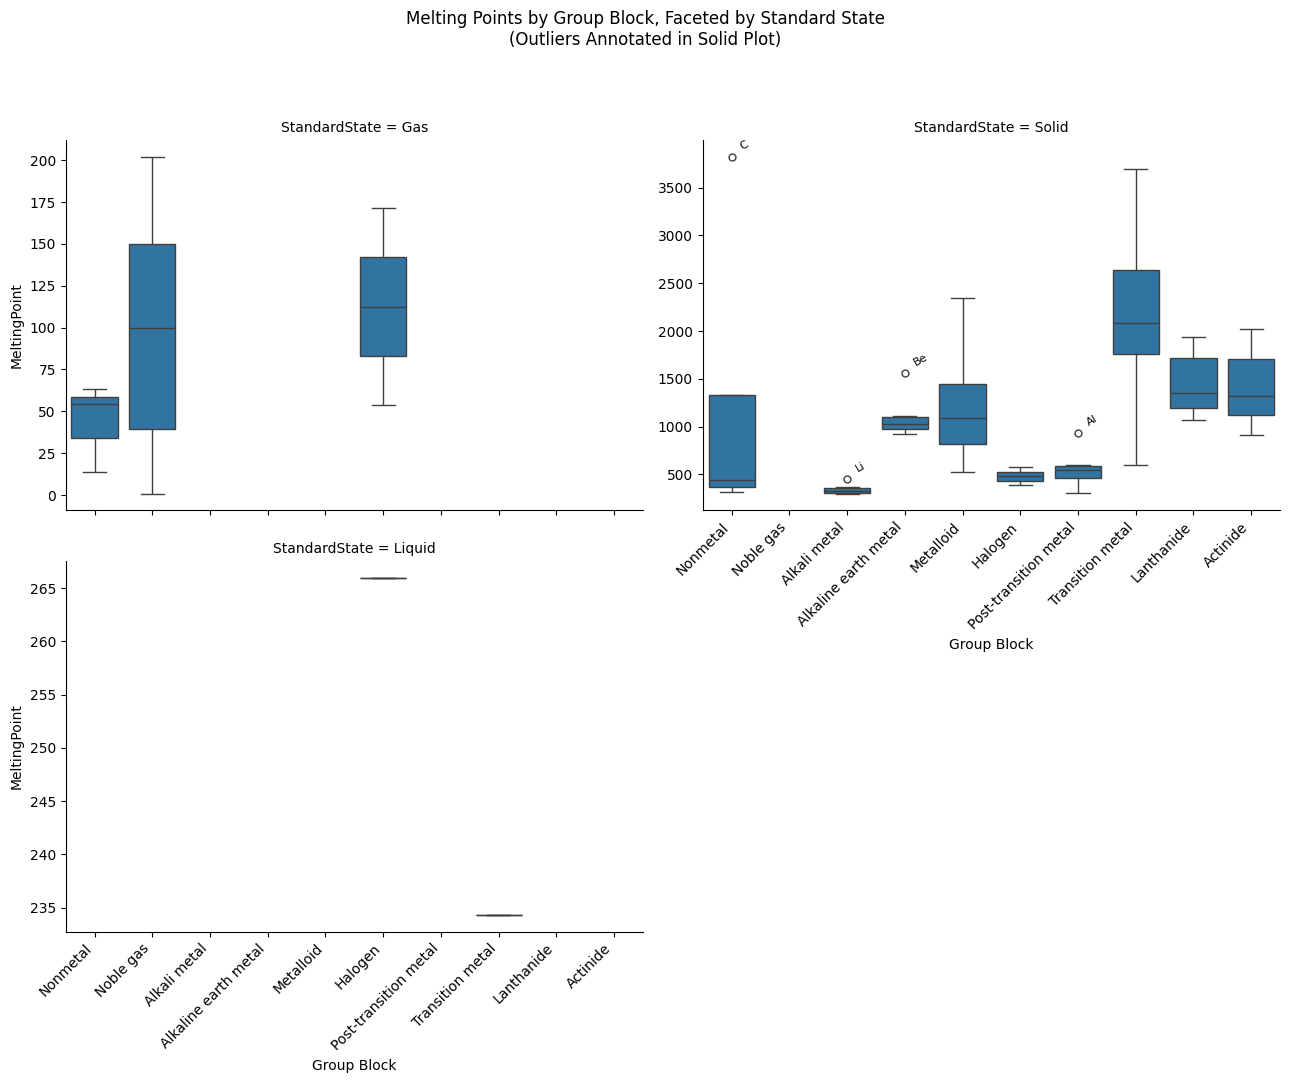

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and clean data
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
df = df.dropna(subset=["MeltingPoint", "GroupBlock", "StandardState"])

# Use consistent group order
group_order = df["GroupBlock"].dropna().unique().tolist()

# Create faceted box plots
g = sns.catplot(
    data=df,
    x="GroupBlock", y="MeltingPoint",
    kind="box",
    col="StandardState",
    col_wrap=2,
    height=5,
    aspect=1.3,
    sharey=False,
    order=group_order
)

# Rotate all x-tick labels
g.fig.canvas.draw()
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
    ax.set_xlabel("Group Block")

# ---------- Annotate Outliers in the 'Solid' Plot ----------

# Get the axis for the 'Solid' subplot
solid_ax = None
for ax, title in zip(g.axes.flat, g.col_names):
    if title == 'Solid':
        solid_ax = ax
        break

if solid_ax:
    # Filter solid-state data
    solid_df = df[df["StandardState"] == "Solid"]

    # Annotate outliers for each group
    for group in solid_df["GroupBlock"].unique():
        group_data = solid_df[solid_df["GroupBlock"] == group]
        y = group_data["MeltingPoint"]
        q1 = y.quantile(0.25)
        q3 = y.quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr

        outliers = group_data[group_data["MeltingPoint"] > upper]

        # Get the x-position from the group order
        x_pos = group_order.index(group)
        for symbol, row in outliers.iterrows():
            solid_ax.annotate(
                text=symbol,
                xy=(x_pos, row["MeltingPoint"]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=8,
                rotation=30,
                ha='left'
            )

# Title
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Melting Points by Group Block, Faceted by Standard State\n(Outliers Annotated in Solid Plot)")

plt.show()


# Acknowledgements
This content was developed with assistance from [Perplexity AI](https://www.perplexity.ai/) and [Chat GPT](https://chatgpt.com/). Multiple queries were made during the Fall 2024 and the Spring 2025.